In [141]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv("resources/HistoricalData/CountyLevelSummary.csv")

In [143]:
df.reset_index(inplace=True, drop=True)

In [144]:
df = df.drop(["Unnamed: 0", "Year"], axis=1)

In [145]:
df.head()

,County,TotalPop,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,EstHouseholds,Net_Migration,Immigration,Domestic_Migration,Interest_Rate
0,Alameda,1284782,35264,589348,29262,226,229890.0,483745.0,3684.0,8600.0,-4916.0,9.34
1,Alameda,1302709,37575,580372,30739,2652,223200.0,485019.0,5100.0,8716.0,-3616.0,8.11
2,Alameda,1318127,38998,581604,31202,3049,217370.0,488485.0,-432.0,9436.0,-9868.0,7.13
3,Alameda,1327526,38190,582410,32175,2617,210010.0,492503.0,-5262.0,7689.0,-12951.0,7.49
4,Alameda,1333031,41139,604087,33263,3515,207880.0,495897.0,-6877.0,6344.0,-13221.0,7.85


In [539]:
df_alameda = df.loc[df["County"] =="Sonoma"]

In [540]:
df_alameda.head()

,County,TotalPop,Employers,Employees,AvgAnnualPay,New Homes Constructed,Avg.Median Home price,EstHouseholds,Net_Migration,Immigration,Domestic_Migration,Interest_Rate
208,Sonoma,394070,13539,146822,23419,2827,188540.0,151514.0,6373.0,844.0,5529.0,9.34
209,Sonoma,402835,14389,146291,24353,2524,198890.0,154386.0,5735.0,994.0,4741.0,8.11
210,Sonoma,410785,14795,149546,24634,1717,195730.0,157108.0,5361.0,1295.0,4066.0,7.13
211,Sonoma,416791,14483,150219,25156,2196,193560.0,158920.0,2304.0,1396.0,908.0,7.49
212,Sonoma,421676,15527,153880,26212,1583,195170.0,161267.0,3228.0,1020.0,2208.0,7.85


In [541]:
df_new = df_alameda[["Avg.Median Home price","Immigration","Employers", "Employees","AvgAnnualPay","New Homes Constructed","EstHouseholds"]]

In [542]:
scatter_matrix(df_new, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27904780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a281e7668>]], dtype=object)

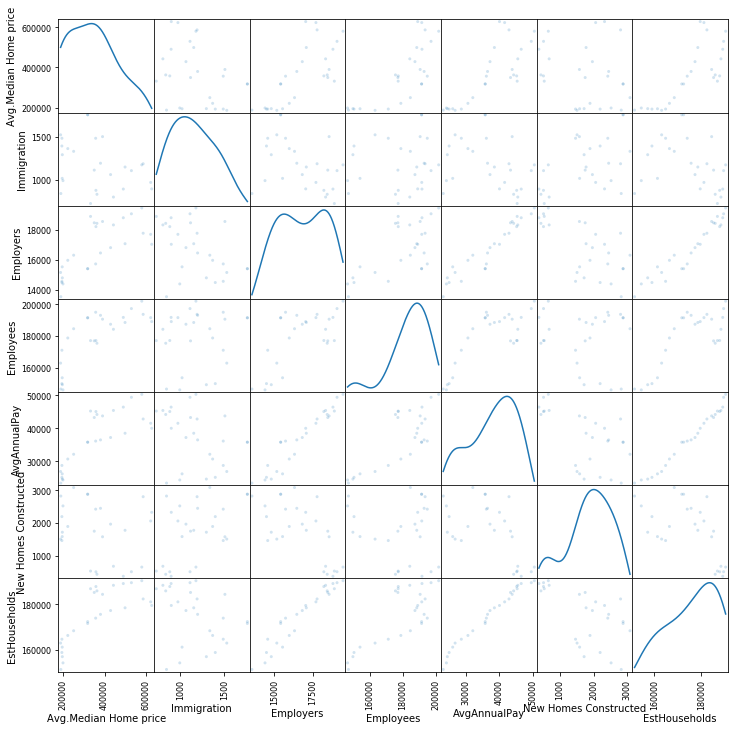

In [543]:
plt.show()

In [544]:
df_new.corr()

,Avg.Median Home price,Immigration,Employers,Employees,AvgAnnualPay,New Homes Constructed,EstHouseholds
Avg.Median Home price,1.000000,-0.313409,0.726772,0.771234,0.797315,-0.216427,0.775790
Immigration,-0.313409,1.000000,-0.424335,0.132823,-0.324435,0.487207,-0.321386
Employers,0.726772,-0.424335,1.000000,0.661852,0.956396,-0.656228,0.959318
Employees,0.771234,0.132823,0.661852,1.000000,0.784009,-0.110327,0.779979
AvgAnnualPay,0.797315,-0.324435,0.956396,0.784009,1.000000,-0.567203,0.989601
New Homes Constructed,-0.216427,0.487207,-0.656228,-0.110327,-0.567203,1.000000,-0.589498
EstHouseholds,0.775790,-0.321386,0.959318,0.779979,0.989601,-0.589498,1.000000


In [545]:
Final_df = df_new[["Avg.Median Home price", "AvgAnnualPay","EstHouseholds", "Employees"]]

In [546]:
Final_df.head()

,Avg.Median Home price,AvgAnnualPay,EstHouseholds,Employees
208,188540.0,23419,151514.0,146822
209,198890.0,24353,154386.0,146291
210,195730.0,24634,157108.0,149546
211,193560.0,25156,158920.0,150219
212,195170.0,26212,161267.0,153880


In [547]:
scatter_matrix(Final_df, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2827b160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a289eb8d0>]], dtype=object)

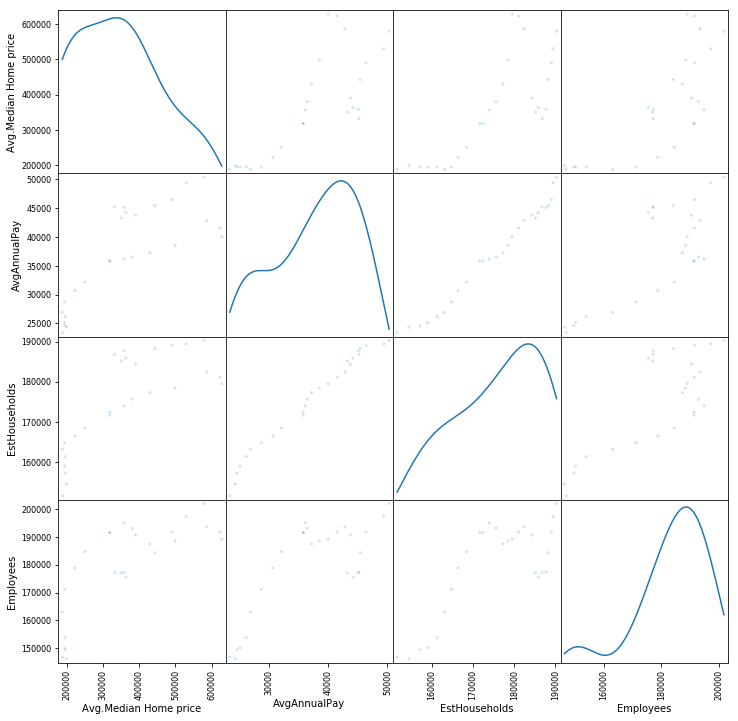

In [548]:
plt.show()

In [549]:
Final_df.corr()

,Avg.Median Home price,AvgAnnualPay,EstHouseholds,Employees
Avg.Median Home price,1.000000,0.797315,0.775790,0.771234
AvgAnnualPay,0.797315,1.000000,0.989601,0.784009
EstHouseholds,0.775790,0.989601,1.000000,0.779979
Employees,0.771234,0.784009,0.779979,1.000000


# Linear Regression Model

## Build multi-variate Linear regression model,

    Dependent Variable = Avg.Median Home price	
    Predictor Variables/Features = Employees, EstHouseholds, AvgAnnualPay	

In [550]:
# Assign the data to X and y

X = Final_df[["Employees", "EstHouseholds", "AvgAnnualPay"]]
y = Final_df["Avg.Median Home price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(27, 3) (27, 1)


In [551]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)

### END SOLUTION

In [552]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [553]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.710011278780281
Testing Score: 0.6694546341083718


# BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

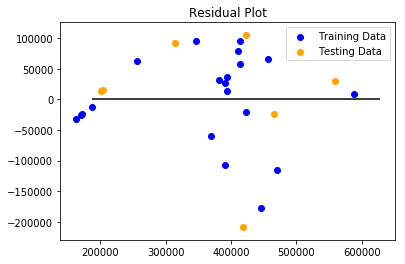

In [554]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION